In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import hashlib
import spacy
import logging
from time import time
import nltk
nltk.download('stopwords')

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
#from google.colab import drive
#drive.mount('/content/drive')
dataset = pd.read_csv('dataset_bmm.csv')
dataset.head(20)

[nltk_data] Downloading package stopwords to /home/zhenya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,prompt,canonical_solution,model_response,target
0,<file_sep><fim_prefix>// Copyright 2020 The Go...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,False
1,<file_sep><fim_prefix>import re\nimport uuid\n...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",False
2,<file_sep><fim_prefix>package tlsrpt\nimport (...,func (p *parser) wsp() {,//../rfc/8460:374,False
3,"<file_sep><fim_prefix>import { describe, expec...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,False
4,<file_sep><fim_prefix>import type {\n Default...,* Include or exclude stale queries,* Include queries matching this mutation key,False
5,<file_sep><fim_prefix>import { TreeGraphData }...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,False
6,"<file_sep><fim_prefix>#include ""tachyon/c/zk/p...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",True
7,<file_sep><fim_prefix>package prisma\nimport (...,"\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",False
8,<file_sep><fim_prefix>// Copyright 2019 The Go...,// on the current extension field.,// on the extension field being iterated over.,False
9,<file_sep><fim_prefix>// Copyright 2020 The Go...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },True


In [2]:
dataset['target'].value_counts()

target
False    4059
True     2603
Name: count, dtype: int64

In [3]:
def diogram(target):
  if target == True:
    return "Positive"
  if target == False:
    return "Negative"

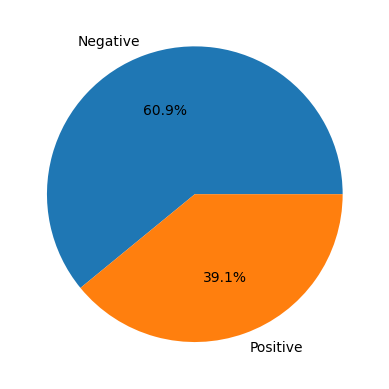

In [4]:
dataset['target'] = dataset['target'].apply(diogram)
plt.pie(dataset['target'].value_counts(), labels=dataset['target'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [5]:
lenth = 0
for i in dataset['prompt']:
  lenth += len(i)
print(lenth)

32750773


In [6]:
#dataset.describe()

In [7]:
int(hashlib.sha1(i.encode("utf-8")).hexdigest(), 16) % (10 ** 8)

def ourhash(x):
  return abs(hash(x)) % (10 ** 8)


dataset['hash_promt'] = dataset['prompt'].apply(ourhash)

dataset.head()




,prompt,canonical_solution,model_response,target,hash_promt
0,<file_sep><fim_prefix>// Copyright 2020 The Go...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,Negative,73738107
1,<file_sep><fim_prefix>import re\nimport uuid\n...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",Negative,27996577
2,<file_sep><fim_prefix>package tlsrpt\nimport (...,func (p *parser) wsp() {,//../rfc/8460:374,Negative,33279091
3,"<file_sep><fim_prefix>import { describe, expec...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,Negative,61860040
4,<file_sep><fim_prefix>import type {\n Default...,* Include or exclude stale queries,* Include queries matching this mutation key,Negative,42837523


# most freq and n - grams


In [8]:
dataset.describe(include='all')


,prompt,canonical_solution,model_response,target,hash_promt
count,6662,6662,6638,6662,6.662000e+03
unique,6652,6282,6161,2,NaN
top,<file_sep><fim_prefix>import pytest\nfrom abst...,\tif err != nil {,},Negative,NaN
freq,2,28,33,4059,NaN
mean,NaN,NaN,NaN,NaN,5.015849e+07
std,NaN,NaN,NaN,NaN,2.890599e+07
min,NaN,NaN,NaN,NaN,2.270700e+04
25%,NaN,NaN,NaN,NaN,2.502686e+07
50%,NaN,NaN,NaN,NaN,5.040787e+07
75%,NaN,NaN,NaN,NaN,7.515939e+07


In [9]:
dataset['prompt'] =  list(map(lambda x: x[22:], dataset['prompt']))
dataset['prompt'] =  list(map(lambda x: x[:-24], dataset['prompt']))

def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

def remove_comments_and_symbols(prompt):
    # Шаг 1: Удаление комментариев
    prompt = re.sub(r'//.*|/\*.*?\*/|#.*', '', prompt, flags=re.DOTALL)

    # Шаг 2: Удаление символов, не являющихся буквами, цифрами и некоторыми специальными символами
    prompt = re.sub(r'[^a-zA-Z0-9\s_]', '', prompt)

    # Шаг 3: Обработка многократных пробелов
    prompt = re.sub(r'\s+', ' ', prompt).strip()

    return prompt

#dataset['promptz'] = dataset['prompt'].apply(clean)
moredata = pd.read_csv('processed_prompt_data.csv')
dataset['promptz'] = moredata


In [10]:
def corpus(text):
    text_list = text.split()
    return text_list

dataset['prompt_lists'] = dataset['promptz'].apply(corpus)
dataset.head(10)

,prompt,canonical_solution,model_response,target,hash_promt,promptz,prompt_lists
0,// Copyright 2020 The Go Authors. All rights r...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,Negative,73738107,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,..."
1,import re\nimport uuid\nimport orjson\nimport ...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",Negative,27996577,import import uuid import orjson import stream...,"[import, import, uuid, import, orjson, import,..."
2,"package tlsrpt\nimport (\n\t""fmt""\n\t""net/url""...",func (p *parser) wsp() {,//../rfc/8460:374,Negative,33279091,package tlsrpt import fmt string extension add...,"[package, tlsrpt, import, fmt, string, extensi..."
3,"import { describe, expect, test } from '@jest/...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,Negative,61860040,import describe expect test const require cons...,"[import, describe, expect, test, const, requir..."
4,"import type {\n DefaultError,\n Enabled,\n ...",* Include or exclude stale queries,* Include queries matching this mutation key,Negative,42837523,import type defaulterror enabled fetchstatus m...,"[import, type, defaulterror, enabled, fetchsta..."
5,import { TreeGraphData } from '@antv/g6-core';...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,Negative,31654334,import treegraphdata import statusenum import ...,"[import, treegraphdata, import, statusenum, im..."
6,"#include ""tachyon/c/zk/plonk/halo2/bn254_gwc_v...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",Positive,14689541,include include memory include utility include...,"[include, include, memory, include, utility, i..."
7,"package prisma\nimport (\n\t""context""\n\t""erro...","\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",Negative,98302043,package prisma import context error fmt type s...,"[package, prisma, import, context, error, fmt,..."
8,// Copyright 2019 The Go Authors. All rights r...,// on the current extension field.,// on the extension field being iterated over.,Negative,25917358,copyright 2019 go author right reserved use so...,"[copyright, 2019, go, author, right, reserved,..."
9,// Copyright 2020 The Go Authors. All rights r...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },Positive,90044842,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,..."


In [11]:
corpus = []
for i in trange(dataset.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += dataset['prompt_lists'][i]
len(corpus)

mostCommon = Counter(corpus).most_common(10)
mostCommon

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 6662/6662 [00:00<00:00, 44813.76it/s]


[('return', 47855),
 ('import', 46044),
 ('string', 34047),
 ('const', 30785),
 ('err', 30084),
 ('nil', 20435),
 ('0', 18749),
 ('func', 18395),
 ('type', 17109),
 ('1', 15535)]

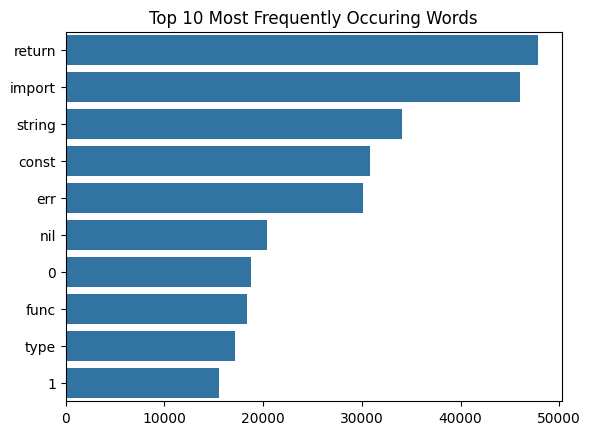

In [12]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [13]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(dataset['promptz'])

In [14]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [15]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [16]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(dataset['promptz'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

In [17]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [18]:
def last(x):
  x = x.split()
  return ' '.join(x[-50:])

dataset['prompt_last'] = dataset['promptz'].apply(last)
dataset.head(10)

,prompt,canonical_solution,model_response,target,hash_promt,promptz,prompt_lists,prompt_last
0,// Copyright 2020 The Go Authors. All rights r...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,Negative,73738107,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,...",sorted fullname return sorted declaration inde...
1,import re\nimport uuid\nimport orjson\nimport ...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",Negative,27996577,import import uuid import orjson import stream...,"[import, import, uuid, import, orjson, import,...",deployed model model relationship f current de...
2,"package tlsrpt\nimport (\n\t""fmt""\n\t""net/url""...",func (p *parser) wsp() {,//../rfc/8460:374,Negative,33279091,package tlsrpt import fmt string extension add...,"[package, tlsrpt, import, fmt, string, extensi...",z b b z b 0 b 9 0 b b b func p parser xvalue s...
3,"import { describe, expect, test } from '@jest/...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,Negative,61860040,import describe expect test const require cons...,"[import, describe, expect, test, const, requir...",adder null expect adder new expect 10 expect 2...
4,"import type {\n DefaultError,\n Enabled,\n ...",* Include or exclude stale queries,* Include queries matching this mutation key,Negative,42837523,import type defaulterror enabled fetchstatus m...,"[import, type, defaulterror, enabled, fetchsta...",defaulterror enabled fetchstatus mutationkey m...
5,import { TreeGraphData } from '@antv/g6-core';...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,Negative,31654334,import treegraphdata import statusenum import ...,"[import, treegraphdata, import, statusenum, im...",entityids entityinternaldetaildesc dimensionli...
6,"#include ""tachyon/c/zk/plonk/halo2/bn254_gwc_v...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",Positive,14689541,include include memory include utility include...,"[include, include, memory, include, utility, i...",crypto math reader switch zk case zk reader st...
7,"package prisma\nimport (\n\t""context""\n\t""erro...","\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",Negative,98302043,package prisma import context error fmt type s...,"[package, prisma, import, context, error, fmt,...",id streameventid tenantid pgtenantid err nil e...
8,// Copyright 2019 The Go Authors. All rights r...,// on the current extension field.,// on the extension field being iterated over.,Negative,25917358,copyright 2019 go author right reserved use so...,"[copyright, 2019, go, author, right, reserved,...",interface xd pv v specially treat invalid list...
9,// Copyright 2020 The Go Authors. All rights r...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },Positive,90044842,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,...",bool field append field messagefield fd v retu...


# lang search

In [19]:
def lang(x):
  for i in x:
    if i in ["nil"]:
      return "go"
    elif i in["include"]:
      return "c++"
    elif i in ["def"]:
      return "python"
    elif i in ['extends', 'implements', 'default', 'instanceof']:
      return "java"
    elif i in ["let", 'enum', 'readonly', 'declare', 'protected']:
      return "typescript"
  return "non"

dataset['language'] = dataset['prompt_lists'].apply(lang)



#go
#pyt
#go
#type
#c++

In [20]:
def lang1(x):
  go = ['nil']
  java = ['interface','extends','implements','synchronized','transient','volatile','default','instanceof','assert','strictfp']
  typescript = ['interface','type','enum','readonly','abstract','public','private','protected','declare']
  python = ['def','lambda']#,'yield','async','await','with','del','global','nonlocal','pass']
  c = ['include']#,'template','namespace','virtual','private', 'protected', 'public','friend','inline','constexpr']
  mas = [['go', 'java', 'type', 'python', 'c'], [0, 0,0,0,0]]
  for i in range(len(mas)):
    mas[1][i] = 0

  for i in x:
    if i in go: mas[1][0] += 100000000
    elif i in java: mas[1][1] += 1
    elif i in typescript: mas[1][2] += 1
    elif i in python: mas[1][3] += 100000000
    elif i in c: mas[1][4]+=10000000000

  a = -1
  z = ''
  for i in range(5):
    if mas[1][i] > a:
      a = mas[1][i]
      z = mas[0][i]
  return z

dataset['language'] = dataset['prompt_lists'].apply(lang1)

In [21]:
dataset.head(250)

,prompt,canonical_solution,model_response,target,hash_promt,promptz,prompt_lists,prompt_last,language
0,// Copyright 2020 The Go Authors. All rights r...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,Negative,73738107,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,...",sorted fullname return sorted declaration inde...,go
1,import re\nimport uuid\nimport orjson\nimport ...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",Negative,27996577,import import uuid import orjson import stream...,"[import, import, uuid, import, orjson, import,...",deployed model model relationship f current de...,python
2,"package tlsrpt\nimport (\n\t""fmt""\n\t""net/url""...",func (p *parser) wsp() {,//../rfc/8460:374,Negative,33279091,package tlsrpt import fmt string extension add...,"[package, tlsrpt, import, fmt, string, extensi...",z b b z b 0 b 9 0 b b b func p parser xvalue s...,go
3,"import { describe, expect, test } from '@jest/...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,Negative,61860040,import describe expect test const require cons...,"[import, describe, expect, test, const, requir...",adder null expect adder new expect 10 expect 2...,go
4,"import type {\n DefaultError,\n Enabled,\n ...",* Include or exclude stale queries,* Include queries matching this mutation key,Negative,42837523,import type defaulterror enabled fetchstatus m...,"[import, type, defaulterror, enabled, fetchsta...",defaulterror enabled fetchstatus mutationkey m...,c
...,...,...,...,...,...,...,...,...,...
245,// Copyright 2019 The Go Authors. All rights r...,\tif mi.unknownPtrKind {,\tif mi.unknownPtrKind {,Positive,54068973,copyright 2019 go author right reserved use so...,"[copyright, 2019, go, author, right, reserved,...",return fi fj needsinitcheck nil nil nil nil ni...,go
246,"import React, { useState, useEffect, useRef } ...",columns: any[];,params: any;,Negative,5072260,import react usestate useeffect useref import ...,"[import, react, usestate, useeffect, useref, i...",import splitpane import pane import usemodel i...,type
247,"import { test, expect } from '@playwright/test...",await modelingHelper.executeRelationshipCR...,await modelingHelper.executeRelationshipCR...,Positive,26431481,import test expect import helper import homehe...,"[import, test, expect, import, helper, import,...",sale value quarter year test crud successfully...,go
248,package com.tencent.supersonic.chat.server.per...,.collect(Collectors.to...,.collect(Collectors.toLi...,Negative,82395658,package import import import import import imp...,"[package, import, import, import, import, impo...",import repository primary slf4j public class c...,type


In [22]:
dataset['language'].value_counts()

language
go        2162
type      2069
c          902
python     846
java       683
Name: count, dtype: int64

# Новый раздел

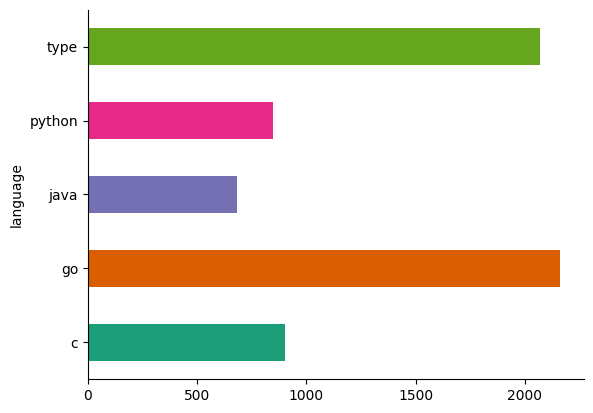

In [23]:
# @title language

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

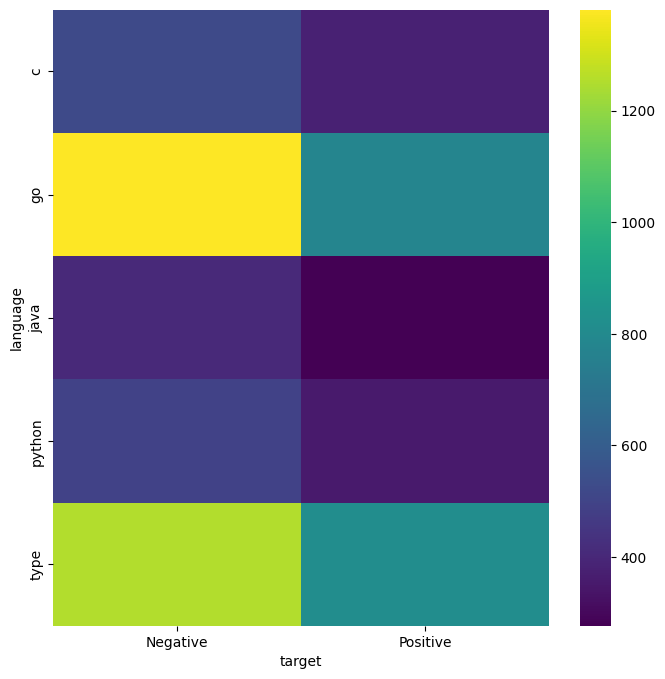

In [24]:
# @title target vs language

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['language'].value_counts()
    for x_label, grp in dataset.groupby('target')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('target')
_ = plt.ylabel('language')

# Word2Vec CBOW

In [25]:
from gensim.models import Word2Vec
import multiprocessing
import logging


model = Word2Vec(dataset['prompt_lists'], vector_size=100, window=5, min_count=1, workers=4)

cores = multiprocessing.cpu_count()

In [26]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc
    #  object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [27]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in dataset['prompt'][:750])

In [28]:
t = time()

#txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=25)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))


Time to clean up everything: 0.0 mins


In [29]:
df_clean = dataset['promptz'] #pd.DataFrame({'clean': txt}) 
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(6600,)

In [30]:
from gensim.models.phrases import Phrases, Phraser

In [31]:
sent = [row.split() for row in df_clean]

In [32]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [33]:
bigram = Phraser(phrases)
sentences = bigram[sent]

In [34]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

31310

In [35]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['return', 'import', 'string', 'const', 'err', 'nil', '0', 'func', 'type', '1']

In [84]:
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=20, window=5, sg=0, vector_size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=15)

In [85]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [86]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.09 mins


In [87]:
w2v_model.init_sims(replace=True)


/tmp/ipykernel_378911/2897808894.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [88]:
w2v_model.wv.most_similar(positive=["return"])

[('switch_case', 0.38787147402763367),
 ('else', 0.376088947057724),
 ('datedate', 0.35895058512687683),
 ('enginerepository', 0.34356918931007385),
 ('xt', 0.3386215567588806),
 ('bool', 0.32319387793540955),
 ('func_p', 0.32044726610183716),
 ('agg', 0.31857624650001526),
 ('msmconfig', 0.3174889087677002),
 ('dateconf', 0.3161466717720032)]

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [90]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

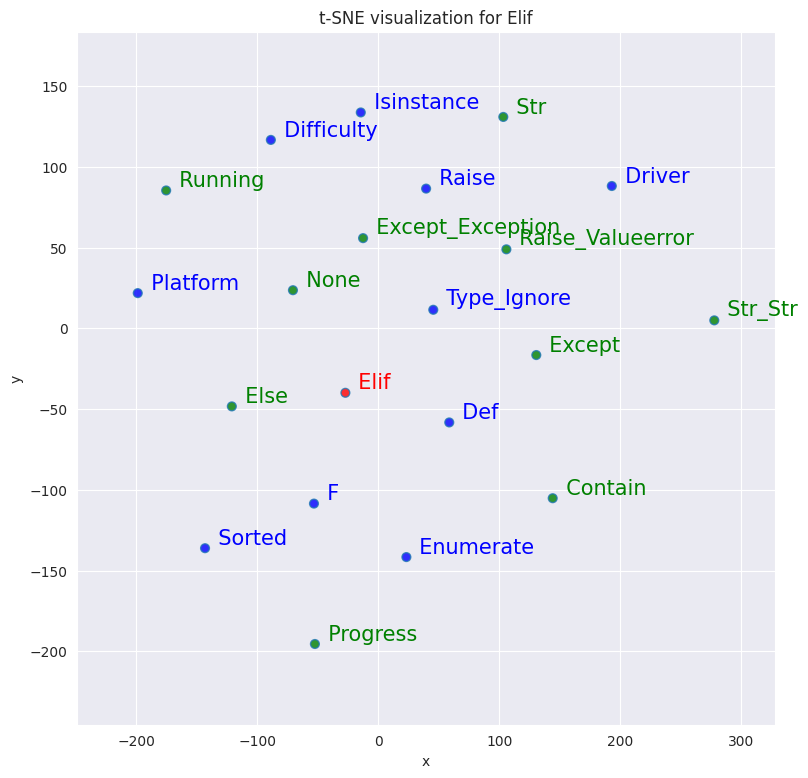

In [114]:
tsnescatterplot(w2v_model, "elif", [t[0] for t in w2v_model.wv.most_similar(positive=["elif"], topn=20)][10:])


# try 50 last word


In [92]:
#dataset.head()

In [93]:


dataset['promptz_last'] = dataset['prompt_last'].apply(clean)

In [94]:
def corpus(text):
    text_list = text.split()
    return text_list

dataset['prompt_lists_last'] = dataset['promptz_last'].apply(corpus)
#dataset.head(10)

In [95]:
corpus = []
for i in trange(dataset.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += dataset['prompt_lists_last'][i]
len(corpus)

mostCommon = Counter(corpus).most_common(10)
mostCommon

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 6662/6662 [00:00<00:00, 198105.99it/s]


[('return', 9432),
 ('import', 6967),
 ('const', 6503),
 ('string', 6006),
 ('err', 4893),
 ('0', 3539),
 ('nil', 3441),
 ('1', 2972),
 ('func', 2588),
 ('type', 2380)]

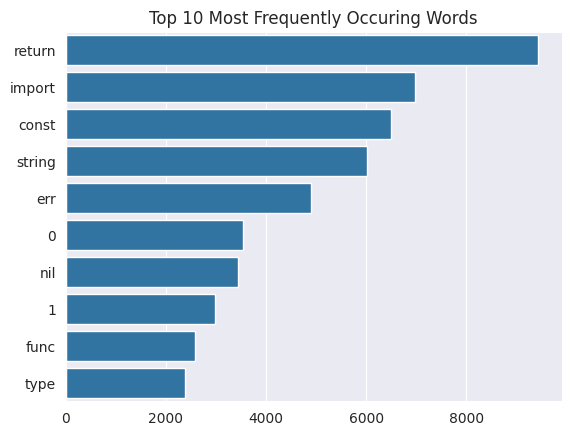

In [96]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [97]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in dataset['prompt_last'])

In [98]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc
    #  object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [99]:
t = time()

#txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=16)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.0 mins


In [100]:
df_clean =  dataset['prompt_last']#pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(6594,)

In [101]:
sent = [row.split() for row in df_clean]

In [102]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [103]:
bigram = Phraser(phrases)
sentences = bigram[sent]

In [104]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

24403

In [105]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['return',
 'const',
 'string',
 '0',
 'err',
 '1',
 'import',
 'error',
 'func',
 'nil']

In [106]:
w2v_model_1 = Word2Vec(min_count=20, window=2, sample=6e-5, vector_size=300, alpha=0.03, min_alpha=0.0007, negative=20, workers=15)

In [107]:
t = time()

w2v_model_1.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [108]:
t = time()

w2v_model_1.train(sentences, total_examples=w2v_model_1.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.09 mins


In [109]:
w2v_model_1.init_sims(replace=True)


/tmp/ipykernel_378911/3602180844.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_1.init_sims(replace=True)


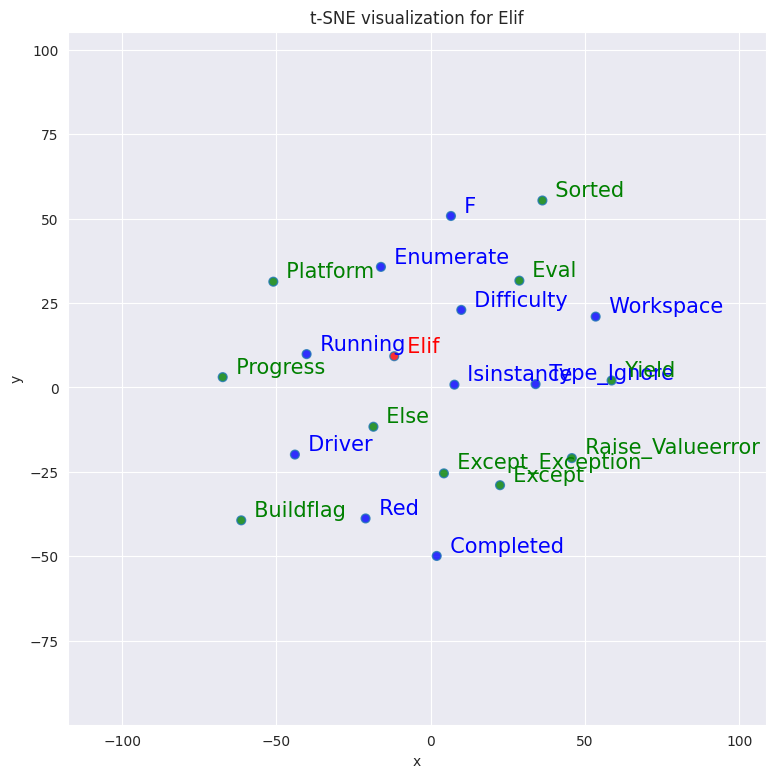

In [115]:
tsnescatterplot(w2v_model_1, "elif", [t[0] for t in w2v_model_1.wv.most_similar(positive=["elif"], topn=20)][10:])


In [110]:
w2v_model_1.wv.most_similar(positive=["return"])

[('switch_case', 0.444305956363678),
 ('else', 0.42167460918426514),
 ('error', 0.41076499223709106),
 ('false', 0.39784276485443115),
 ('val', 0.3676660656929016),
 ('enginerepository', 0.35741448402404785),
 ('err_nil', 0.3500525653362274),
 ('0', 0.3497158885002136),
 ('err', 0.34894874691963196),
 ('true', 0.34889519214630127)]

In [111]:
w2v_model.wv.most_similar(positive=["return"])

[('switch_case', 0.38787147402763367),
 ('else', 0.376088947057724),
 ('datedate', 0.35895058512687683),
 ('enginerepository', 0.34356918931007385),
 ('xt', 0.3386215567588806),
 ('bool', 0.32319387793540955),
 ('func_p', 0.32044726610183716),
 ('agg', 0.31857624650001526),
 ('msmconfig', 0.3174889087677002),
 ('dateconf', 0.3161466717720032)]